In [1]:
import numpy as np
import pandas as pd
import sys
import Thermobar as pt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import warnings as w
pd.options.display.max_columns = None

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [3]:
out=pt.import_excel(r'../LEPR_Wet_Stitched_Sept2022.xlsx', sheet_name='Opx-Liq')
myOpxs1=out['Opxs']
myLiquids1=out['Liqs']
Opx_Glass=out['my_input']
notinLEPR= Opx_Glass['Citation_x'].str.contains('notinLEPR')
notinKeith=(Opx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Opx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))
newMask=notinLEPR|notinKeith
newMask=newMask.fillna(False)

mask_1GPa=Opx_Glass['P_kbar_x']<13
mask_1GPa=mask_1GPa.fillna(False)

Press_new=mask_1GPa&newMask
Press_new1=Press_new.fillna(False)

Eq_tests=pt.calculate_orthopyroxene_liquid_components(liq_comps=myLiquids1, opx_comps=myOpxs1,
                                                      Fe3Fet_Liq=0)


C:\Users\penny\AppData\Local\Temp\ipykernel_28192\1420685576.py:6: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  notinKeith=(Opx_Glass['Citation_x'].str.contains('Mercer, C.N., and Johnston, A.D. (2008)'))|(Opx_Glass['Citation_x'].str.contains('Alonso-Perez, R., Müntener, O., and Ulmer, P. (2009)'))


## Quant water contents

In [4]:
Test_input_All=out['my_input'].loc[Press_new1]
VBD_cal_mask=Test_input_All['H2O_Liq_Method'].str.contains('VBD_GSC')
VBD_cal_mask=VBD_cal_mask.fillna(False)

VBD_mask=Test_input_All['H2O_Liq_Method'].str.contains('VBD')
VBD_mask=VBD_mask.fillna(False)
FTIR_mask=Test_input_All['H2O_Liq_Method'].str.contains('FTIR')
FTIR_mask=FTIR_mask.fillna(False)
SIMS_mask=Test_input_All['H2O_Liq_Method'].str.contains('SIMS')
SIMS_mask=SIMS_mask.fillna(False)
Raman_mask=Test_input_All['H2O_Liq_Method'].str.contains('Raman')
Raman_mask=Raman_mask.fillna(False)
Sol_mask=Test_input_All['H2O_Liq_Method'].str.contains('Sol')
Sol_mask=Sol_mask.fillna(False)
balance_mask=Test_input_All['H2O_Liq_Method'].str.contains('balance')
balance_mask=balance_mask.fillna(False)

added_mask=Test_input_All['H2O_Liq_Method'].str.contains('added')
added_mask=added_mask.fillna(False)
Quantmethod1=FTIR_mask|SIMS_mask|Raman_mask

nonzero=Test_input_All['H2O_Liq']>0
Quantmethod=(VBD_cal_mask|FTIR_mask|SIMS_mask|Raman_mask)&nonzero
NonQuantmethod=(VBD_mask&~VBD_cal_mask)|balance_mask|added_mask
NoH2O=Test_input_All['H2O_Liq_Method']==0
NoH2O=NoH2O.fillna(False)



## Which of our barometers is best

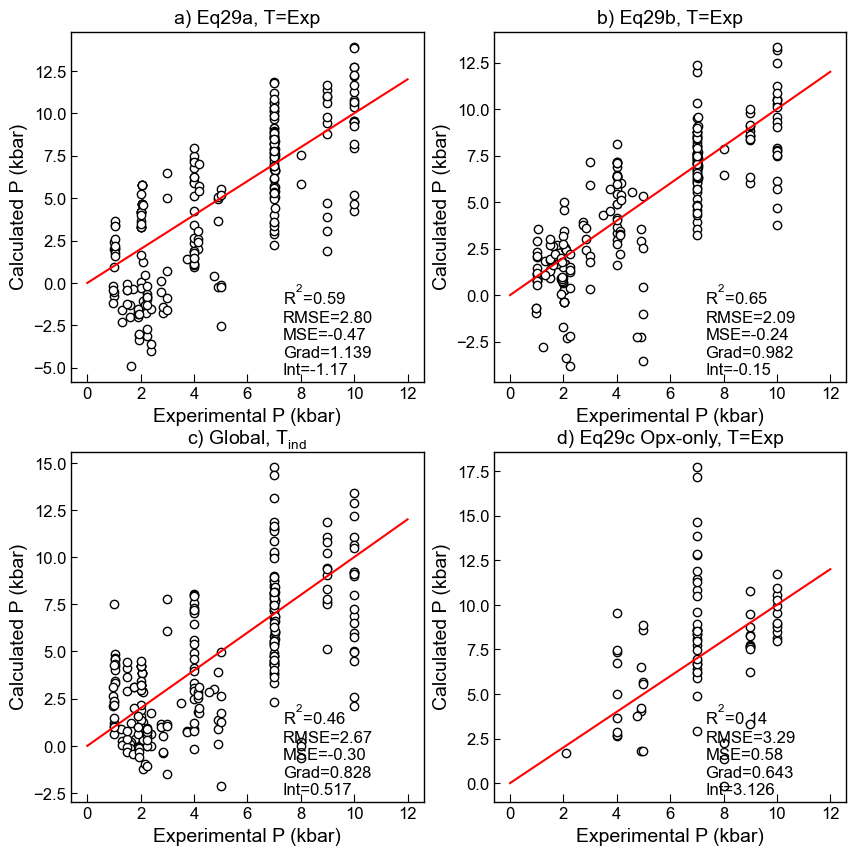

In [5]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

#############################################################3
CalcP_29a=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put2008_eq29a",T=Opx_Glass['T_K_x'])


ax1.plot(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_29a.loc[Press_new], 'ok', mfc='white')
ax1.plot([0,  12], [0,  12], '-r')

stats_29aP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_29a.loc[Press_new]) 

ax1.annotate("R$^{2}$="+str(stats_29aP['R2']), xy=(0.6, 0.22),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(stats_29aP['RMSE']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MSE="+str(stats_29aP['Mean']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(stats_29aP['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(stats_29aP['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)

############################################################333

CalcP_29b=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put2008_eq29b",T=Opx_Glass['T_K_x'])


stats_29bP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_29b.loc[Press_new]) 


ax2.plot(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_29b.loc[Press_new], 'ok', mfc='white')
ax2.plot([0,  12], [0,  12], '-r')


ax2.annotate("R$^{2}$="+str(stats_29bP['R2']), xy=(0.6, 0.22),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(stats_29bP['RMSE']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MSE="+str(stats_29bP['Mean']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(stats_29bP['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(stats_29bP['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)


##################################

CalcP_Glob=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put_Global_Opx",T=Opx_Glass['T_K_x'])


ax3.plot(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_Glob.loc[Press_new], 'ok', mfc='white')
ax3.plot([0,  12], [0,  12], '-r')

stats_GlobP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_Glob.loc[Press_new]) 

ax3.annotate("R$^{2}$="+str(stats_GlobP['R2']), xy=(0.6, 0.22),
xycoords="axes fraction", fontsize=12)
ax3.annotate("RMSE="+str(stats_GlobP['RMSE']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax3.annotate("MSE="+str(stats_GlobP['Mean']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Grad="+str(np.round(stats_GlobP['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Int="+str(np.round(stats_GlobP['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)

ax1.set_title('a) Eq29a, T=Exp')
ax2.set_title('b) Eq29b, T=Exp')
ax3.set_title('c) Global, T$_{ind}$')
ax4.set_title('d) Eq29c Opx-only, T=Exp')

############################################
CalcP_29c=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put2008_eq29c",T=Opx_Glass['T_K_x'])


ax4.plot(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_29c.loc[Press_new], 'ok', mfc='white')
ax4.plot([0,  12], [0,  12], '-r')

stats_29cP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new], CalcP_29c.loc[Press_new]) 

ax4.annotate("R$^{2}$="+str(stats_29cP['R2']), xy=(0.6, 0.22),
xycoords="axes fraction", fontsize=12)
ax4.annotate("RMSE="+str(stats_29cP['RMSE']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax4.annotate("MSE="+str(stats_29cP['Mean']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax4.annotate("Grad="+str(np.round(stats_29cP['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax4.annotate("Int="+str(np.round(stats_29cP['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)

ax1.set_xlabel('Experimental P (kbar)')
ax1.set_ylabel('Calculated P (kbar)')
ax2.set_xlabel('Experimental P (kbar)')
ax2.set_ylabel('Calculated P (kbar)')
ax3.set_xlabel('Experimental P (kbar)')
ax3.set_ylabel('Calculated P (kbar)')
ax4.set_xlabel('Experimental P (kbar)')
ax4.set_ylabel('Calculated P (kbar)')
fig.savefig('Supporting_Fig_DiffBarometers.png', dpi=200)

## Using only quant water

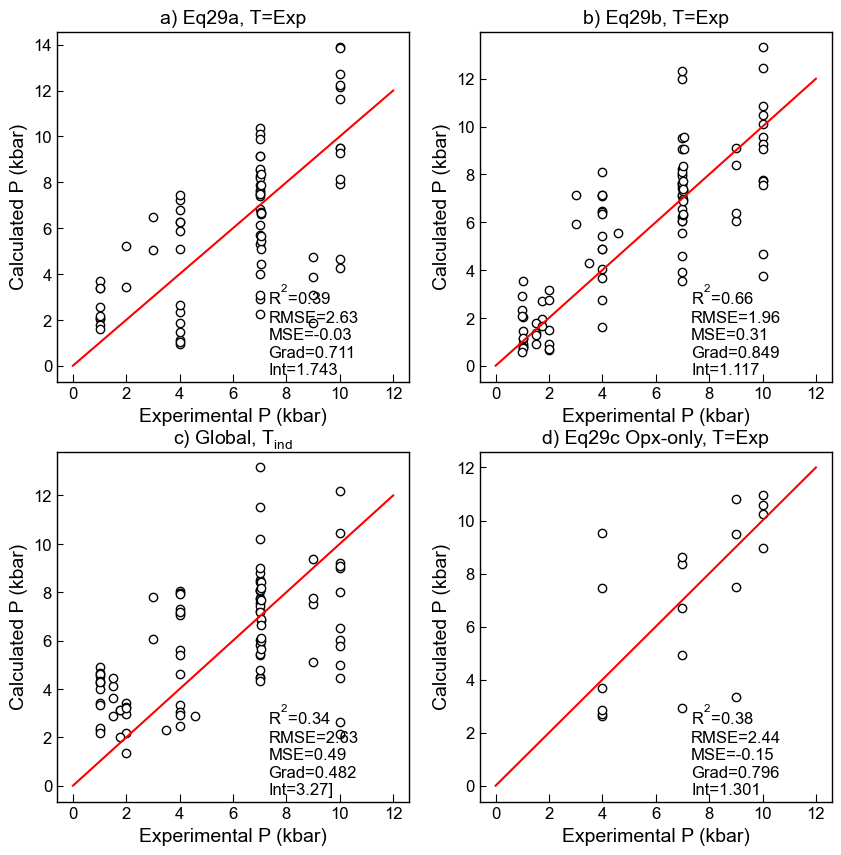

In [6]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,10))

#############################################################3
CalcP_29a=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put2008_eq29a",T=Opx_Glass['T_K_x'])


ax1.plot(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_29a.loc[Press_new&Quantmethod], 'ok', mfc='white')
ax1.plot([0,  12], [0,  12], '-r')

stats_29aP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_29a.loc[Press_new&Quantmethod]) 

ax1.annotate("R$^{2}$="+str(stats_29aP['R2']), xy=(0.6, 0.22),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(stats_29aP['RMSE']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MSE="+str(stats_29aP['Mean']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(stats_29aP['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(stats_29aP['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)

############################################################333

CalcP_29b=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put2008_eq29b",T=Opx_Glass['T_K_x'])


stats_29bP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_29b.loc[Press_new&Quantmethod]) 


ax2.plot(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_29b.loc[Press_new&Quantmethod], 'ok', mfc='white')
ax2.plot([0,  12], [0,  12], '-r')


ax2.annotate("R$^{2}$="+str(stats_29bP['R2']), xy=(0.6, 0.22),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(stats_29bP['RMSE']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MSE="+str(stats_29bP['Mean']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(stats_29bP['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(stats_29bP['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)


##################################

CalcP_Glob=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put_Global_Opx",T=Opx_Glass['T_K_x'])


ax3.plot(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_Glob.loc[Press_new&Quantmethod], 'ok', mfc='white')
ax3.plot([0,  12], [0,  12], '-r')

stats_GlobP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_Glob.loc[Press_new&Quantmethod]) 

ax3.annotate("R$^{2}$="+str(stats_GlobP['R2']), xy=(0.6, 0.22),
xycoords="axes fraction", fontsize=12)
ax3.annotate("RMSE="+str(stats_GlobP['RMSE']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax3.annotate("MSE="+str(stats_GlobP['Mean']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Grad="+str(np.round(stats_GlobP['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Int="+str(np.round(stats_GlobP['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)

ax1.set_title('a) Eq29a, T=Exp')
ax2.set_title('b) Eq29b, T=Exp')
ax3.set_title('c) Global, T$_{ind}$')
ax4.set_title('d) Eq29c Opx-only, T=Exp')

############################################
CalcP_29c=pt.calculate_opx_liq_press(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationP="P_Put2008_eq29c",T=Opx_Glass['T_K_x'])


ax4.plot(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_29c.loc[Press_new&Quantmethod], 'ok', mfc='white')
ax4.plot([0,  12], [0,  12], '-r')

stats_29cP=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new&Quantmethod], CalcP_29c.loc[Press_new&Quantmethod]) 

ax4.annotate("R$^{2}$="+str(stats_29cP['R2']), xy=(0.6, 0.22),
xycoords="axes fraction", fontsize=12)
ax4.annotate("RMSE="+str(stats_29cP['RMSE']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax4.annotate("MSE="+str(stats_29cP['Mean']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax4.annotate("Grad="+str(np.round(stats_29cP['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax4.annotate("Int="+str(np.round(stats_29cP['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)

ax1.set_xlabel('Experimental P (kbar)')
ax1.set_ylabel('Calculated P (kbar)')
ax2.set_xlabel('Experimental P (kbar)')
ax2.set_ylabel('Calculated P (kbar)')
ax3.set_xlabel('Experimental P (kbar)')
ax3.set_ylabel('Calculated P (kbar)')
ax4.set_xlabel('Experimental P (kbar)')
ax4.set_ylabel('Calculated P (kbar)')
fig.savefig('Supporting_Fig_DiffBarometers_QuantH2O.png', dpi=200)

## Which of our two thermometers is better

In [7]:
CalcT_28a_ExpP=pt.calculate_opx_liq_temp(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationT="T_Put2008_eq28a",P=Opx_Glass['P_kbar_x'])

CalcT_28b_ExpP=pt.calculate_opx_liq_temp(liq_comps=myLiquids1,
opx_comps=myOpxs1, equationT="T_Put2008_eq28b_opx_sat",P=Opx_Glass['P_kbar_x'])


C:\Users\penny\AppData\Local\Temp\ipykernel_28192\2648817915.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ok" (-> color='k'). The keyword argument will take precedence.
  plt.plot(CalcT_28a_ExpP.loc[Press_new], CalcT_28b_ExpP.loc[Press_new], 'ok', color='red')


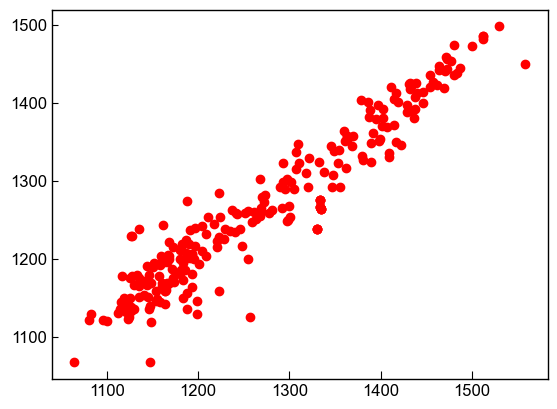

In [8]:
plt.plot(CalcT_28a_ExpP.loc[Press_new], CalcT_28b_ExpP.loc[Press_new], 'ok', color='red')

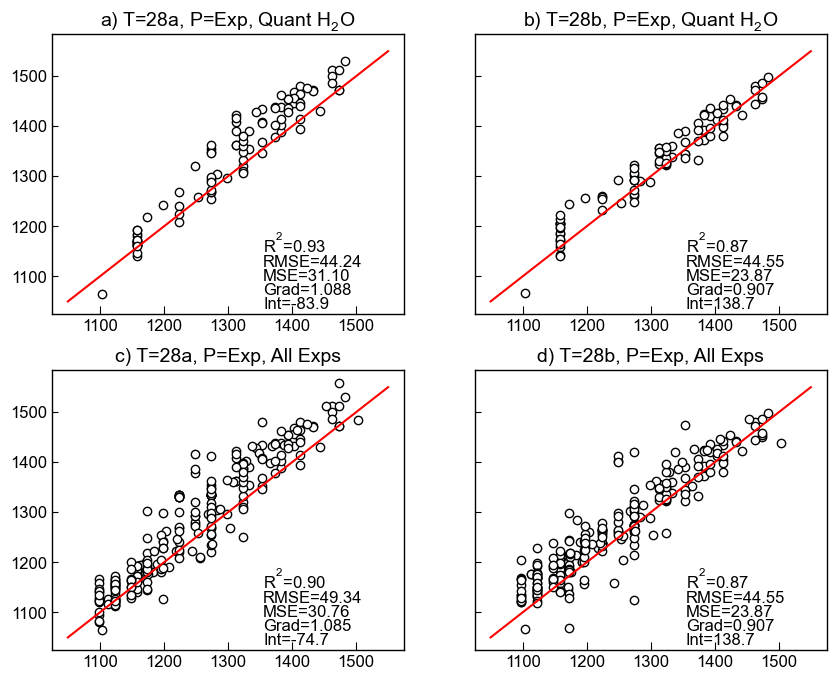

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8), sharey=True)
ax1.plot(Opx_Glass['T_K_x'].loc[Press_new&Quantmethod], CalcT_28a_ExpP.loc[Press_new&Quantmethod], 'ok', mfc='white')
ax2.plot(Opx_Glass['T_K_x'].loc[Press_new&Quantmethod], CalcT_28b_ExpP.loc[Press_new&Quantmethod], 'ok', mfc='white')
ax1.plot([1050, 1550], [1050, 1550], '-r')
ax2.plot([1050, 1550], [1050, 1550], '-r')


stats_28aP=pt.calculate_R2(Opx_Glass['T_K_x'].loc[Press_new&Quantmethod],
                           CalcT_28a_ExpP.loc[Press_new&Quantmethod]) 

ax1.annotate("R$^{2}$="+str(stats_28aP['R2']), xy=(0.6, 0.22),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(stats_28aP['RMSE']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MSE="+str(stats_28aP['Mean']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(stats_28aP['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(stats_28aP['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)

stats_28bP=pt.calculate_R2(Opx_Glass['T_K_x'].loc[Press_new], CalcT_28b_ExpP.loc[Press_new]) 

ax2.annotate("R$^{2}$="+str(stats_28bP['R2']), xy=(0.6, 0.22),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(stats_28bP['RMSE']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MSE="+str(stats_28bP['Mean']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(stats_28bP['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(stats_28bP['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)

ax1.set_title('a) T=28a, P=Exp, Quant H$_2$O')
ax2.set_title('b) T=28b, P=Exp, Quant H$_2$O')

ax3.plot(Opx_Glass['T_K_x'].loc[Press_new], CalcT_28a_ExpP.loc[Press_new], 'ok', mfc='white')
ax4.plot(Opx_Glass['T_K_x'].loc[Press_new], CalcT_28b_ExpP.loc[Press_new], 'ok', mfc='white')
ax3.plot([1050, 1550], [1050, 1550], '-r')
ax4.plot([1050, 1550], [1050, 1550], '-r')


stats_28aP=pt.calculate_R2(Opx_Glass['T_K_x'].loc[Press_new],
                           CalcT_28a_ExpP.loc[Press_new]) 

ax3.annotate("R$^{2}$="+str(stats_28aP['R2']), xy=(0.6, 0.22),
xycoords="axes fraction", fontsize=12)
ax3.annotate("RMSE="+str(stats_28aP['RMSE']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax3.annotate("MSE="+str(stats_28aP['Mean']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Grad="+str(np.round(stats_28aP['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Int="+str(np.round(stats_28aP['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)

stats_28bP=pt.calculate_R2(Opx_Glass['T_K_x'].loc[Press_new], CalcT_28b_ExpP.loc[Press_new]) 

ax4.annotate("R$^{2}$="+str(stats_28bP['R2']), xy=(0.6, 0.22),
xycoords="axes fraction", fontsize=12)
ax4.annotate("RMSE="+str(stats_28bP['RMSE']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax4.annotate("MSE="+str(stats_28bP['Mean']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax4.annotate("Grad="+str(np.round(stats_28bP['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax4.annotate("Int="+str(np.round(stats_28bP['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)

ax3.set_title('c) T=28a, P=Exp, All Exps')
ax4.set_title('d) T=28b, P=Exp, All Exps')
fig.savefig('Supporting_Fig_DiffThermometers.png', dpi=200)

## Simpler plots for review

In [10]:
Put_28a_GlobalP=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1,
                                         
            opx_comps=myOpxs1, equationT="T_Put2008_eq28a",equationP="P_Put_Global_Opx").T_K_calc

Put_28a_GlobalPkbar=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1,
                                         
            opx_comps=myOpxs1, equationT="T_Put2008_eq28a",equationP="P_Put_Global_Opx").P_kbar_calc

Out_Global_FixedT=pt.calculate_opx_liq_press(liq_comps=myLiquids1, opx_comps=myOpxs1, 
                                equationP="P_Put_Global_Opx")


Opx_only29c_with28a=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1, opx_comps=myOpxs1, 
                                equationP="P_Put2008_eq29c", equationT="T_Put2008_eq28a")

Opx_only29b_with28a=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1, opx_comps=myOpxs1, 
                                equationP="P_Put2008_eq29b", equationT="T_Put2008_eq28a")

Opx_only29b_with28a=pt.calculate_opx_liq_press_temp(liq_comps=myLiquids1, opx_comps=myOpxs1, 
                                equationP="P_Put2008_eq29a", equationT="T_Put2008_eq28a")

In [11]:
len(Put_28a_GlobalPkbar)

425

In [12]:
# EQ29c uses Cr log, What percentage are giving Nans because of zero Cr contents
100*sum(Opx_Glass['Cr2O3_Opx'].loc[Press_new]==0)/sum(Opx_Glass['P_kbar_x'].loc[Press_new])

14.531804948695342

In [13]:
## EQ28a uses ln of FM2Si2O6 term
100*sum(Eq_tests['ln_Fm2Si2O6_liq']>0)/len(Eq_tests['ln_Fm2Si2O6_liq'])

100.0

In [14]:
## Eq28b uses ln_FmAl2SiO6_liq
100*sum(Eq_tests['ln_FmAl2SiO6_liq']>0)/len(Eq_tests['ln_FmAl2SiO6_liq'])

91.05882352941177

## How is the FmAl2SiO6 term even calculated
    opx_calc['FmAl2SiO6'] = opx_calc['Al_VI_Opx_cat_6ox'] - \
        opx_calc['NaAlSi2O6'] - opx_calc['CrAl2SiO6']
    opx_calc.FmAl2SiO6[opx_calc.FmAl2SiO6 < 0] = 0
    
    opx_calc['NaAlSi2O6'] = opx_calc['Na_Opx_cat_6ox']
    opx_calc['FmTiAlSiO6'] = opx_calc['Ti_Opx_cat_6ox']
    opx_calc['CrAl2SiO6'] = opx_calc['Cr_Opx_cat_6ox']    

In [15]:
FmAl_neg=~(Eq_tests['ln_FmAl2SiO6_liq']>-100)
FmAlOpx_neg=Eq_tests['FmAl2SiO6']<0
CrNeg=Eq_tests['Cr2O3_Opx']==0
AlVINeg=Eq_tests['Al_VI_Opx_cat_6ox']==0
print(len(Opx_Glass['P_kbar_x'].loc[Press_new&FmAl_neg])/len(Opx_Glass['P_kbar_x'].loc[Press_new]))
print(len(Opx_Glass['P_kbar_x'].loc[Press_new&FmAlOpx_neg])/len(Opx_Glass['P_kbar_x'].loc[Press_new]))
print(len(Opx_Glass['P_kbar_x'].loc[Press_new&CrNeg&FmAl_neg])/len(Opx_Glass['P_kbar_x'].loc[Press_new]))
print(len(Opx_Glass['P_kbar_x'].loc[Press_new&AlVINeg])/len(Opx_Glass['P_kbar_x'].loc[Press_new]))


0.07782101167315175
0.0
0.07003891050583658
0.06614785992217899


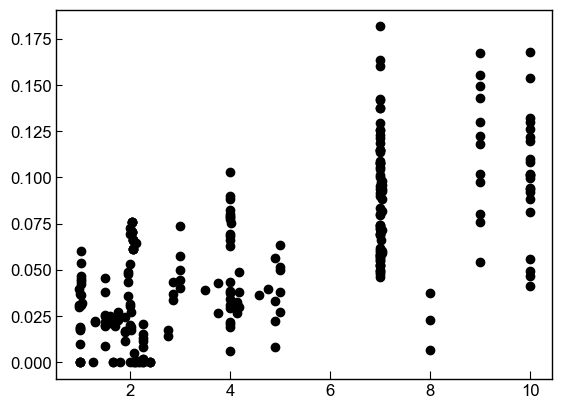

In [16]:
plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new], Eq_tests['Al_VI_Opx_cat_6ox'].loc[Press_new], 'ok')

In [17]:
plot2=Eq_tests['ln_FmAl2SiO6_liq'].replace([np.inf, -np.inf], -0.02)
plot2

0      5.053363
1      2.409940
2      2.563982
3      3.320994
4     -0.020000
         ...   
420    4.393306
421    3.935427
422    4.230242
423    3.287766
424    4.003668
Name: ln_FmAl2SiO6_liq, Length: 425, dtype: float64

Text(0, 0.5, 'Al VI')

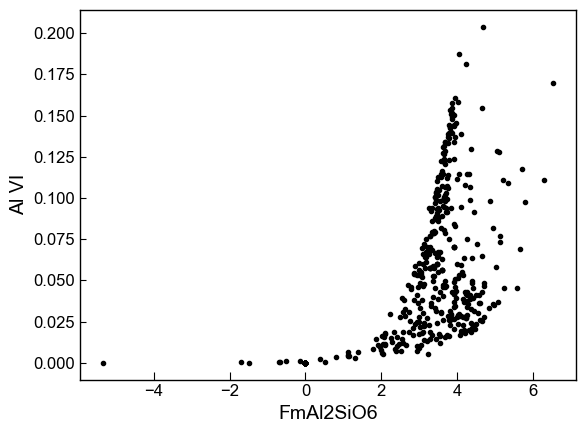

In [18]:
plt.plot(plot2, Eq_tests['FmAl2SiO6'], '.k')
plt.xlabel('FmAl2SiO6')
plt.ylabel('Al VI')
# plt.xlim([-0.03, 0.01])
# plt.ylim([-0.01, 0.05])

Proportion with neg Al2
0.07782101167315175


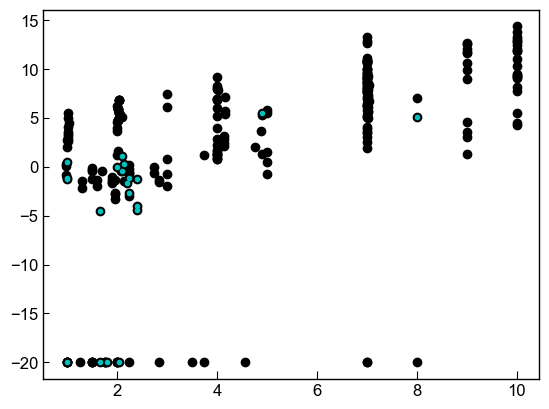

In [19]:
test_log=Opx_only29b_with28a.copy()
test_log=test_log.fillna(-20)
# Working out what is going wrong
NoCr=Opx_Glass['Cr2O3_Opx']==0
FmSi_neg=~(Eq_tests['ln_Fm2Si2O6_liq']>-100)
FmAl_neg=~(Eq_tests['ln_FmAl2SiO6_liq']>-100)
print('Proportion with neg Al2')
print(len(Opx_Glass['P_kbar_x'].loc[Press_new&FmAl_neg])/len(Opx_Glass['P_kbar_x'].loc[Press_new]))

plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new], 
         test_log['P_kbar_calc'].loc[Press_new], 'ok')

# plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new&NoCr], 
#          test_log['P_kbar_calc'].loc[Press_new&NoCr], 'or', label='NoCr')
# plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new&FmSi_neg], 
#          test_log['P_kbar_calc'].loc[Press_new&FmSi_neg], 'oc', label='NoCr')
plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new&FmAl_neg], 
         test_log['P_kbar_calc'].loc[Press_new&FmAl_neg], '.c', label='NoCr')


## Evaluating numerical errors for 28a

In [20]:
CalcT=pt.calculate_opx_liq_temp(opx_comps=myOpxs1, liq_comps=myLiquids1,
                                equationT="T_Put2008_eq28a", P=Opx_Glass['P_kbar_x'])

test_log=CalcT.copy()
test_log=test_log.fillna(-20)
# Working out what is going wrong
NoCr=Opx_Glass['Cr2O3_Opx']==0
FmSi_neg=Eq_tests['ln_Fm2Si2O6_liq']<0
FmAl_neg=Eq_tests['ln_FmAl2SiO6_liq']<0
print('Proportion with no Cr')
print(len(Opx_Glass['P_kbar_x'].loc[Press_new&NoCr])/len(Opx_Glass['P_kbar_x'].loc[Press_new]))



Proportion with no Cr
0.688715953307393


In [21]:
sum(CalcT>-100)/len(CalcT)

1.0

## Evaluating numerical errors for 29c

Proportion with no Cr
0.688715953307393


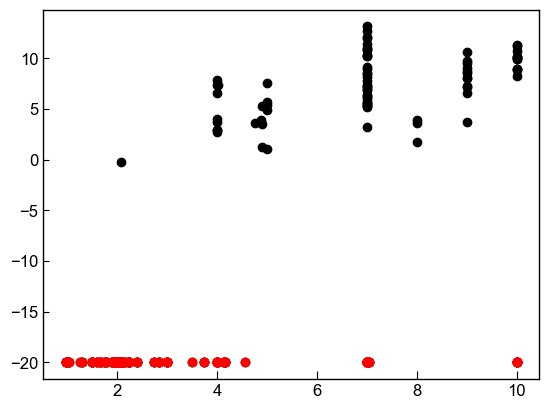

In [22]:
test_log=Opx_only29c_with28a.copy()
test_log=test_log.fillna(-20)
# Working out what is going wrong
NoCr=Opx_Glass['Cr2O3_Opx']==0
FmSi_neg=Eq_tests['ln_Fm2Si2O6_liq']<0
FmAl_neg=Eq_tests['ln_FmAl2SiO6_liq']<0
print('Proportion with no Cr')
print(len(Opx_Glass['P_kbar_x'].loc[Press_new&NoCr])/len(Opx_Glass['P_kbar_x'].loc[Press_new]))

plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new], 
         test_log['P_kbar_calc'].loc[Press_new], 'ok')

plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new&NoCr], 
         test_log['P_kbar_calc'].loc[Press_new&NoCr], 'or', label='NoCr')
plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new&FmSi_neg], 
         test_log['P_kbar_calc'].loc[Press_new&FmSi_neg], '.c', label='NoCr')
# plt.plot(Opx_Glass['P_kbar_x'].loc[Press_new&FmAl_neg], 
#          test_log['P_kbar_calc'].loc[Press_new&FmAl_neg], '.c', label='NoCr')


g:\my drive\postdoc\pymme\mybarometers\thermobar_outer\src\Thermobar\orthopyroxene_thermobarometry.py:210: UserWarning: The selected barometer uses the log of Cr2O3 component of Opx, which is zero for some of your compositions. This means the function will return infinity.
  w.warn('The selected barometer uses the log of Cr2O3 component of '


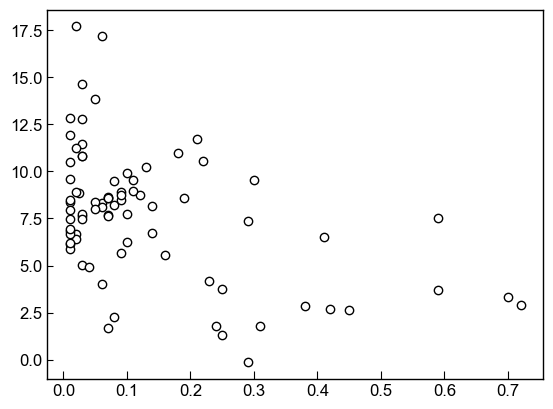

In [23]:
Opx_only29c=pt.calculate_opx_only_press( opx_comps=myOpxs1, 
                                equationP="P_Put2008_eq29c", T=Opx_Glass['T_K_x'])
plt.plot(Opx_Glass['Cr2O3_Opx'].loc[Press_new],
         Opx_only29c.loc[Press_new], 'ok', mfc='white')


## Using all experiments - all water contents

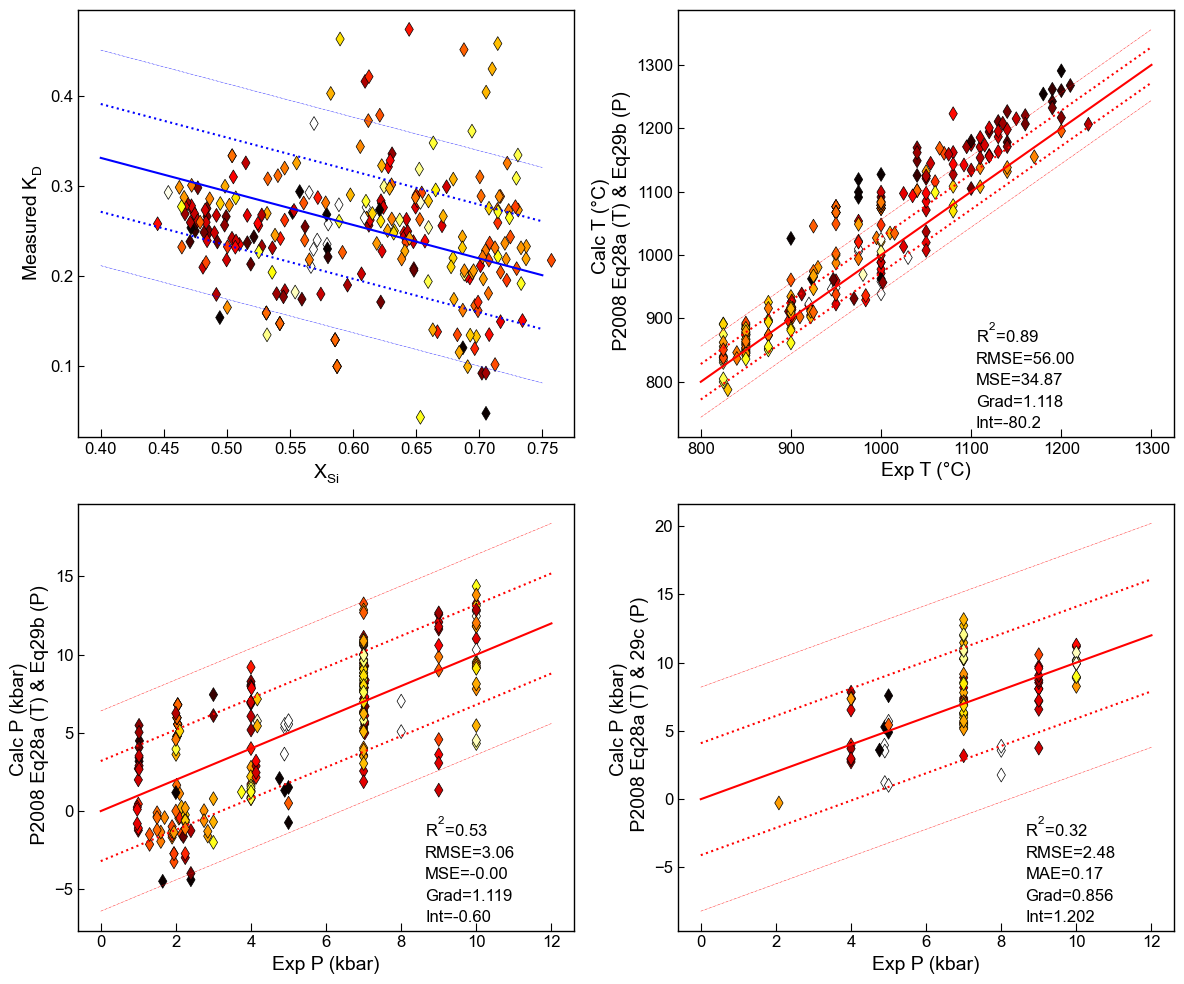

In [24]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2, figsize = (12,10)) # adjust dimensions of figure 

s=ax0.scatter(Eq_tests['Si_Liq_cat_frac'].loc[Press_new], 
         Eq_tests['Kd_Fe_Mg_Fet'].loc[Press_new],
              marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new], cmap='hot',
vmin = 0, vmax = 10)

# ax0.plot(Eq_tests['Si_Liq_cat_frac'].loc[Press_new], 
#          Eq_tests['Kd_Fe_Mg_Fet'].loc[Press_new], 'ok', mfc='white')
# ax0.plot(Eq_tests2['Si_Liq_cat_frac'].loc[Press_new2], 
#          Eq_tests2['Kd_Fe_Mg_Fet'].loc[Press_new2], 'ok', mfc='blue')

#ax0.plot(Eq_tests['Si_Liq_cat_frac'].loc[SomeFe3], Eq_tests['Kd_Fe_Mg_Fe2'].loc[SomeFe3], '.r', mfc='red')
linspace_Si=np.linspace(0.4, 0.75, 50)
Linspace_Kd=0.4805 - 0.3733 *linspace_Si
ax0.plot(linspace_Si, Linspace_Kd-0.06, ':b')
ax0.plot(linspace_Si, Linspace_Kd-0.12, '-.b', lw=0.3)
ax0.plot(linspace_Si, Linspace_Kd, '-b')
ax0.plot(linspace_Si, Linspace_Kd+0.06, ':b')
ax0.plot(linspace_Si, Linspace_Kd+0.12, '-.b', lw=0.3)
ax0.set_xlabel('X$_{Si}$')
ax0.set_ylabel('Measured K$_{D}$')


## Plotting temperature
# ax1.plot(Opx_Glass['T_K_x'].loc[Press_new]-273.15, 
#          Put_28a_GlobalP.loc[Press_new]-273.15, 'ok', mfc='white')
s=ax1.scatter(Opx_Glass['T_K_x'].loc[Press_new]-273.15, 
         Opx_only29b_with28a['T_K_calc'].loc[Press_new]-273.15, marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new], cmap='hot',
vmin = 0, vmax = 10)
#fig.colorbar(s, ax=ax1)
ax1.plot([800, 1300], [800, 1300], '-r')
ax1.plot([800, 1300], [800+28, 1300+28], ':r')
ax1.plot([800, 1300], [800-28, 1300-28], ':r')
ax1.plot([800, 1300], [800+2*28, 1300+2*28],  '-.r', lw=0.3)
ax1.plot([800, 1300], [800-2*28, 1300-2*28],  '-.r', lw=0.3)



Stats_28aGlob=pt.calculate_R2(Opx_Glass['T_K_x'].loc[Press_new]-273.15, 
         Opx_only29b_with28a['T_K_calc'].loc[Press_new]-273.15)

# ax1.annotate("Cpx Mg#>0.68", xy=(0.6, 0.24),
# xycoords="axes fraction", fontsize=12, fontweight='bold')
ax1.annotate("R$^{2}$="+str(Stats_28aGlob['R2']), xy=(0.6, 0.22),
xycoords="axes fraction", fontsize=12)
ax1.annotate("RMSE="+str(Stats_28aGlob['RMSE']), xy=(0.6, 0.17),
xycoords="axes fraction", fontsize=12)
ax1.annotate("MSE="+str(Stats_28aGlob['Mean']), xy=(0.6, 0.12),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Grad="+str(np.round(Stats_28aGlob['Grad'], 3))[1:6], xy=(0.6, 0.07),
xycoords="axes fraction", fontsize=12)
ax1.annotate("Int="+str(np.round(Stats_28aGlob['Int'], 3))[1:6], xy=(0.6, 0.02),
xycoords="axes fraction", fontsize=12)



#ax2.plot(Opx_Glass['P_kbar_x'].loc[Press_new], Out_Global_FixedT.loc[Press_new], 'ok', mfc='white')

s=ax2.scatter(Opx_Glass['P_kbar_x'].loc[Press_new], Opx_only29b_with28a['P_kbar_calc'].loc[Press_new],
              marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new], cmap='hot',
vmin = 0, vmax = 10)
#fig.colorbar(s, ax=ax2)

ax2.plot([0, 12], [0, 12], '-r')
ax2.plot([0, 12], [0+3.2, 12+3.2], ':r')
ax2.plot([0, 12], [0-3.2, 12-3.2], ':r')
ax2.plot([0, 12], [0+2*3.2, 12+2*3.2], '-.r', lw=0.3)
ax2.plot([0, 12], [0-2*3.2, 12-2*3.2],  '-.r', lw=0.3)
stats_global=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new],
                             Opx_only29b_with28a['P_kbar_calc'].loc[Press_new])

xcord=0.7
ax2.annotate("R$^{2}$="+str(stats_global['R2']), xy=(xcord, 0.22),
xycoords="axes fraction", fontsize=12)
ax2.annotate("RMSE="+str(stats_global['RMSE']), xy=(xcord, 0.17),
xycoords="axes fraction", fontsize=12)
ax2.annotate("MSE="+str(stats_global['Mean']), xy=(xcord, 0.12),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Grad="+str(np.round(stats_global['Grad'], 3))[1:6], xy=(xcord, 0.07),
xycoords="axes fraction", fontsize=12)
ax2.annotate("Int="+str(np.round(stats_global['Int'], 3))[1:6], xy=(xcord, 0.02),
xycoords="axes fraction", fontsize=12)

ax2.set_xlabel('Exp P (kbar)')
ax2.set_ylabel('Calc P (kbar) \n P2008 Eq28a (T) & Eq29b (P)')


############### Opx-only pressure
# ax3.plot(Opx_Glass['P_kbar_x'].loc[Press_new],
#          Opx_only29c_with28a['P_kbar_calc'].loc[Press_new], 'ok', mfc='white')

s=ax3.scatter(Opx_Glass['P_kbar_x'].loc[Press_new],
         Opx_only29c_with28a['P_kbar_calc'].loc[Press_new],
              marker='d', s=50, edgecolors='k', linewidths=0.5,
            c=Opx_Glass['H2O_Liq'].loc[Press_new], cmap='hot',
vmin = 0, vmax = 10)


ax1.set_xlabel('Exp T (°C)')
ax1.set_ylabel('Calc T (°C) \n P2008 Eq28a (T) & Eq29b (P)')

ax3.set_xlabel('Exp P (kbar)')
ax3.set_ylabel('Calc P (kbar) \n P2008 Eq28a (T) & 29c (P)')


ax3.plot([0, 12], [0, 12], '-r')
ax3.plot([0, 12], [0+4.1, 12+4.1], ':r')
ax3.plot([0, 12], [0-4.1, 12-4.1], ':r')
ax3.plot([0, 12], [0+2*4.1, 12+2*4.1], '-.r', lw=0.3)
ax3.plot([0, 12], [0-2*4.1, 12-2*4.1],  '-.r', lw=0.3)


stats_opxonly=pt.calculate_R2(Opx_Glass['P_kbar_x'].loc[Press_new],
         Opx_only29c_with28a['P_kbar_calc'].loc[Press_new])

xcord=0.7
ax3.annotate("R$^{2}$="+str(stats_opxonly['R2']), xy=(xcord, 0.22),
xycoords="axes fraction", fontsize=12)
ax3.annotate("RMSE="+str(stats_opxonly['RMSE']), xy=(xcord, 0.17),
xycoords="axes fraction", fontsize=12)
ax3.annotate("MAE="+str(stats_opxonly['Mean']), xy=(xcord, 0.12),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Grad="+str(np.round(stats_opxonly['Grad'], 3))[1:6], xy=(xcord, 0.07),
xycoords="axes fraction", fontsize=12)
ax3.annotate("Int="+str(np.round(stats_opxonly['Int'], 3))[1:6], xy=(xcord, 0.02),
xycoords="axes fraction", fontsize=12)

#fig.colorbar(s, ax=ax3)
fig.tight_layout()
fig.savefig('Opx_Liq.png', dpi=200, transparent=True)